# Data preprocessing
- Imported Data from CSV
- Removed irrelavant data(NAN)
- Plotted ax and ay wrt time

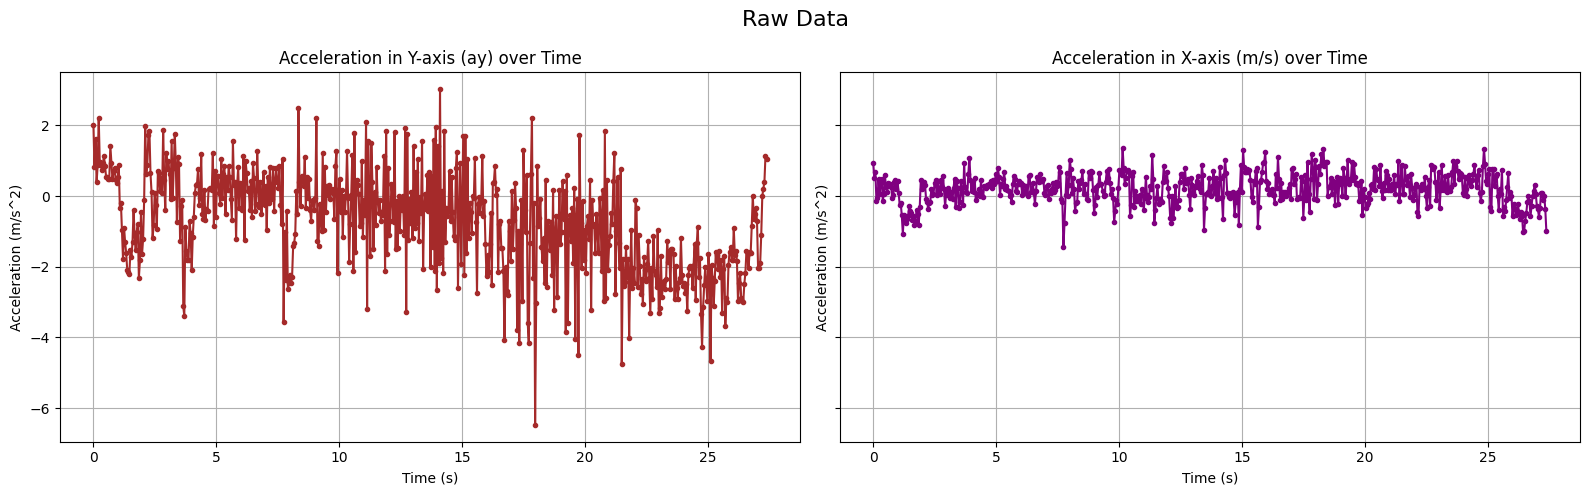

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('data1.csv')
# print(df.to_string())
df = df.dropna()
# print(df.to_string())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
fig.suptitle('Raw Data', fontsize=16)
ax1.plot(df['time'], df['ay'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (m/s) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)

plt.tight_layout() 
plt.show()


# DC Bias Removal(Sensor Calibration)

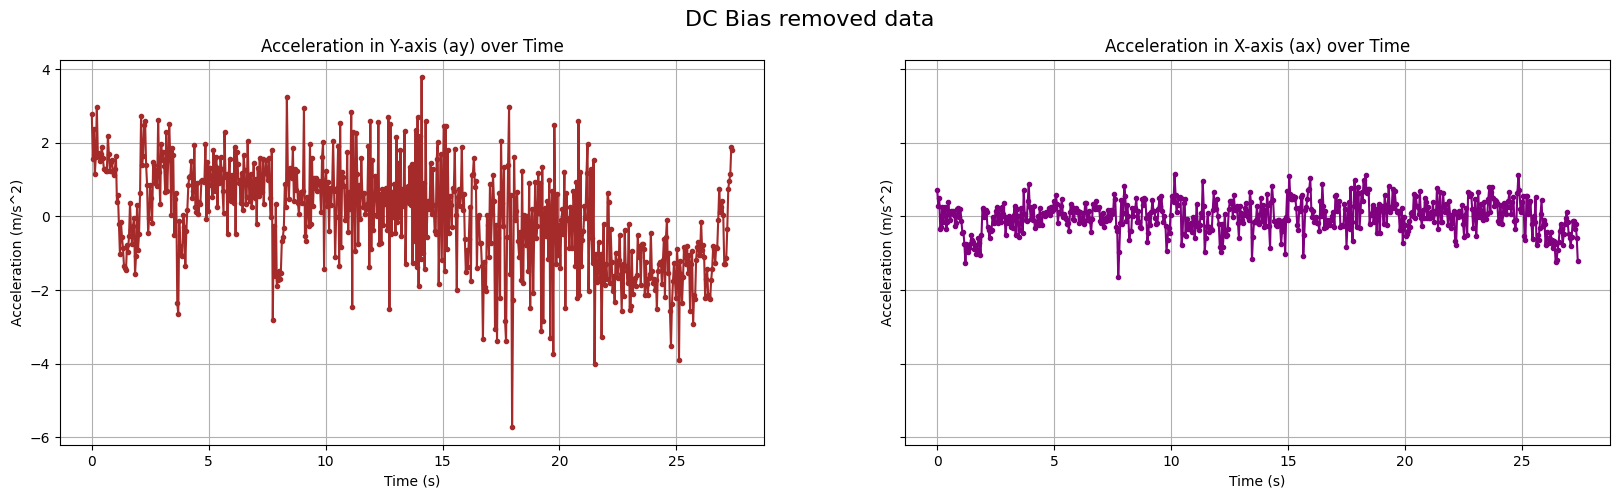

In [3]:
df['ay_bias'] = df['ay'].copy()  # Make a copy of ay
df['ax_bias'] = df['ax'].copy()  # Make a copy of ax

ay_mean = df['ay_bias'].mean()
ax_mean = df['ax_bias'].mean()

for i in range (0,len(df)):
    df.loc[i, 'ay_bias'] = df.loc[i, 'ay_bias'] - ay_mean
    df.loc[i, 'ax_bias'] = df.loc[i, 'ax_bias'] - ax_mean

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('DC Bias removed data', fontsize=16)
ax1.plot(df['time'], df['ay_bias'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax_bias'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)



# Exponential Moving Average Filter

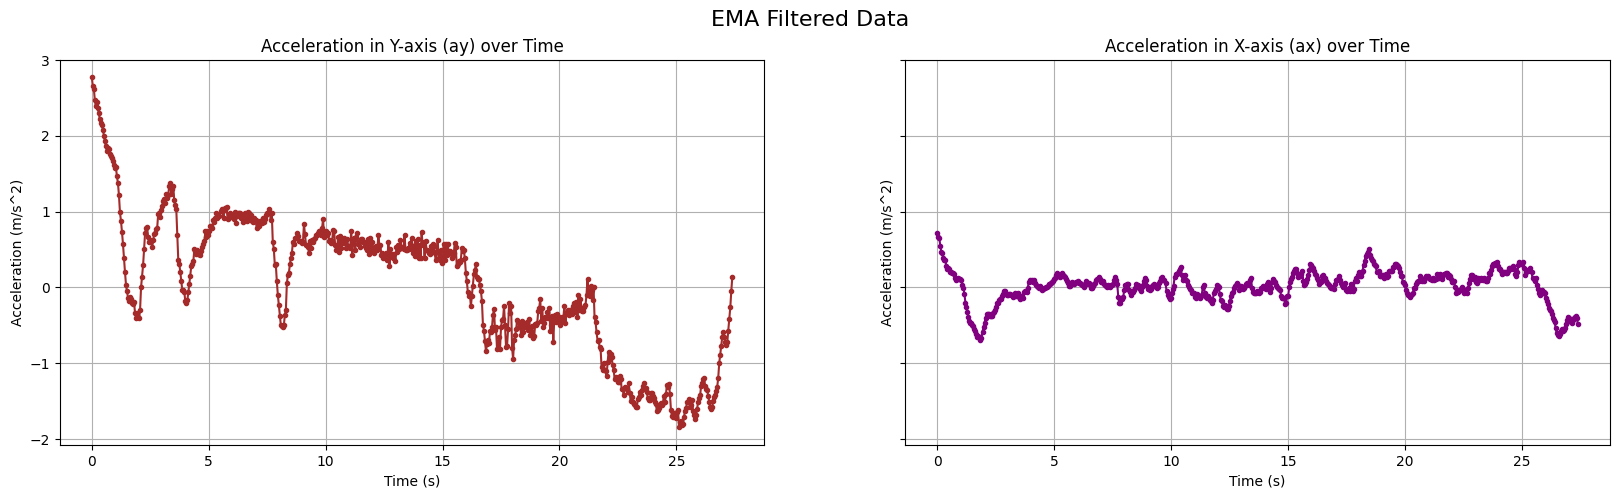

In [4]:
df['ay_ema'] = df['ay_bias'].copy()  # Make a copy of dc bias removed ay
df['ax_ema'] = df['ax_bias'].copy()  # Make a copy of dc bias removed ax

# Apply EMA filter
for i in range(1, len(df)):
    df.loc[i, 'ay_ema'] = df.loc[i - 1, 'ay_ema'] * 0.9 + df.loc[i, 'ay_bias'] * 0.1
    df.loc[i, 'ax_ema'] = df.loc[i - 1, 'ax_ema'] * 0.9 + df.loc[i, 'ax_bias'] * 0.1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('EMA Filtered Data', fontsize=16)
ax1.plot(df['time'], df['ay_ema'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Acceleration in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Acceleration (m/s^2)') 
ax1.grid(True)

ax2.plot(df['time'], df['ax_ema'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Acceleration in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Acceleration (m/s^2)') 
ax2.grid(True)

# Velocity Estimation

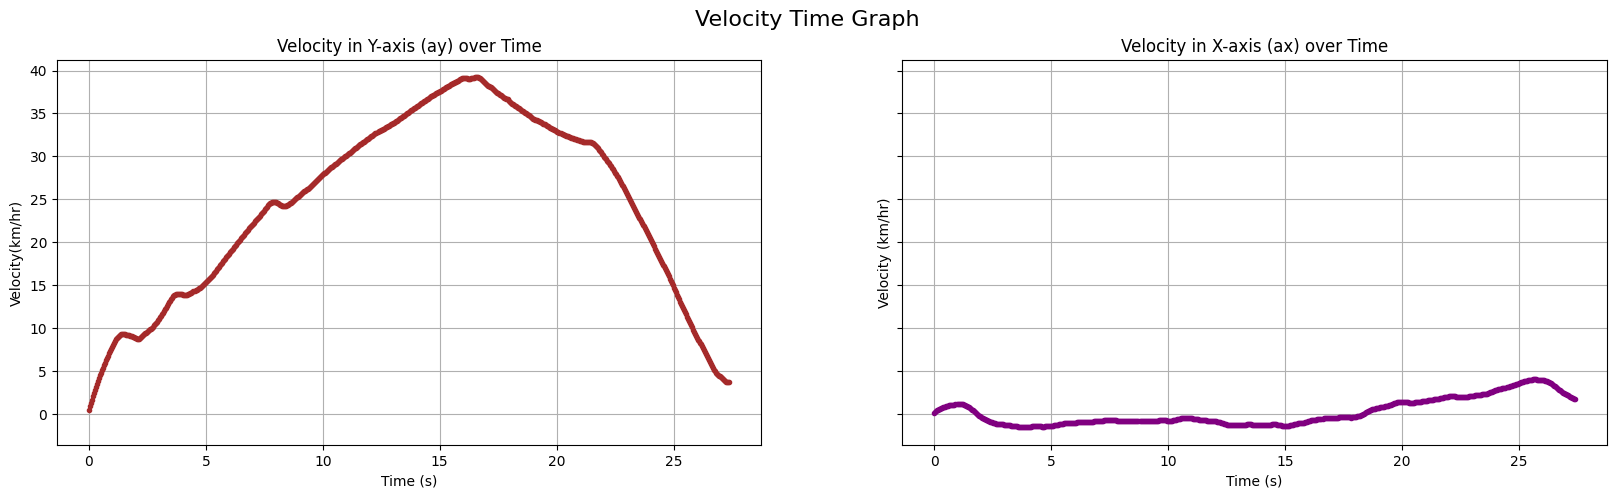

In [5]:
df['vy'] = df['ay_ema'].copy()  # Copy ay for Velocity estimation
df['vx'] = df['ax_ema'].copy()  # Copy ax for Velocity estimation

for i in range(1,len(df)):
    df.loc[i, 'vy'] = (df.loc[i - 1, 'vy'] + df.loc[i, 'ay_ema'] ) 
    df.loc[i, 'vx'] = (df.loc[i - 1, 'vx'] + df.loc[i, 'ax_ema'] ) 

df['vy'] = df['vy'] /23  # Divide by 23 since 23 samples/s
df['vx'] = df['vx'] /23 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Velocity Time Graph', fontsize=16)
ax1.plot(df['time'], df['vy']*18/5, marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Velocity in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Velocity(km/hr)') 
ax1.grid(True)

ax2.plot(df['time'], df['vx']*18/5, marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Velocity in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Velocity (km/hr)') 
ax2.grid(True)


# Distance Estimation

Distance travelled in X-axis: 1.4890245525802952
Distance travelled in Y-axis: 186.39463778864015
Net Distance: 186.4005852739646
       time      ax       ay       az       yaw   ay_bias   ax_bias    ay_ema    ax_ema         vy        vx          sy        sx
0     0.000  0.9208  2.01992   9.3312  196.9097  2.770411  0.710587  2.770411  0.710587   0.120453  0.030895    0.005237  0.001343
1     0.043  0.5018  0.81512   9.5670  196.9644  1.565611  0.291587  2.649931  0.668687   0.235667  0.059968    0.015483  0.003951
2     0.086  0.6934  1.61096   9.8567  197.0134  2.361451  0.483187  2.621083  0.650137   0.349627  0.088235    0.030685  0.007787
3     0.129 -0.1290  0.38512  10.5558  197.0761  1.135611 -0.339213  2.472536  0.551202   0.457129  0.112201    0.050560  0.012665
4     0.172 -0.0692  0.86496   9.7023  197.1323  1.615451 -0.279413  2.386828  0.468141   0.560904  0.132555    0.074947  0.018428
5     0.215  0.4707  2.20952   9.1660  197.1727  2.960011  0.260487  2.444146  0.447

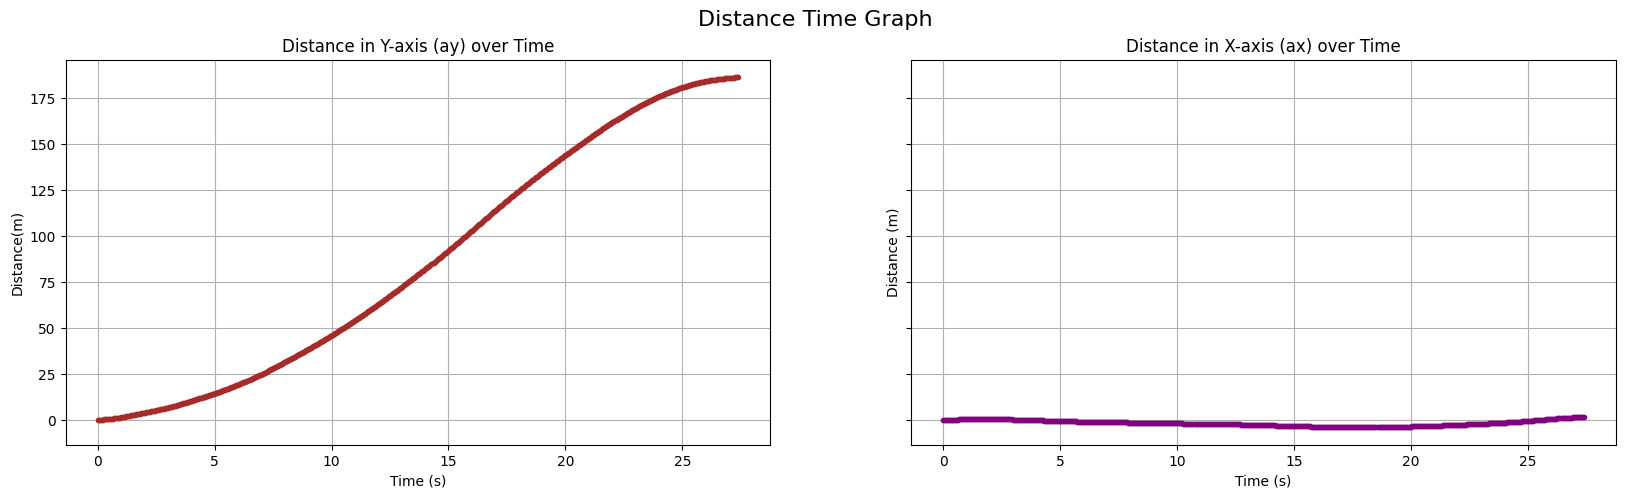

In [6]:
df['sy'] = df['vy'].copy()  # Copy ay for Velocity estimation
df['sx'] = df['vx'].copy()  # Copy ax for Velocity estimation

for i in range(1,len(df)):
    df.loc[i, 'sy'] = (df.loc[i - 1, 'sy'] + df.loc[i, 'vy'] )
    df.loc[i, 'sx'] = (df.loc[i - 1, 'sx'] + df.loc[i, 'vx']) 

df['sy'] = df['sy'] /23  # Divide by 23 since 23 samples/s
df['sx'] = df['sx'] /23 

dx = df['sx'].iloc[-1]
dy = df['sy'].iloc[-1]
distance = math.sqrt(dx**2 + dy**2)
print('Distance travelled in X-axis:',dx)
print('Distance travelled in Y-axis:',dy)
print('Net Distance:',distance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Distance Time Graph', fontsize=16)
ax1.plot(df['time'], df['sy'], marker='o', linestyle='-', color='brown', markersize=3)
ax1.set_title('Distance in Y-axis (ay) over Time') 
ax1.set_xlabel('Time (s)') 
ax1.set_ylabel('Distance(m)') 
ax1.grid(True)

ax2.plot(df['time'], df['sx'], marker='o', linestyle='-', color='purple', markersize=3) 
ax2.set_title('Distance in X-axis (ax) over Time') 
ax2.set_xlabel('Time (s)') 
ax2.set_ylabel('Distance (m)') 
ax2.grid(True)
print(df.to_string())

# Converting Distances to Global frame of reference(NWU)

In [7]:
df['Dn'] = df['sx'] * np.cos(np.radians(df['yaw'])) - df['sy'] * np.sin(np.radians(df['yaw']))
df['Dw'] = -df['sx'] * np.sin(np.radians(df['yaw'])) - df['sy'] * np.cos(np.radians(df['yaw']))

df['distance'] = np.sqrt(df['Dn']**2 + df['Dw']**2)
print(df.to_string())


       time      ax       ay       az       yaw   ay_bias   ax_bias    ay_ema    ax_ema         vy        vx          sy        sx         Dn          Dw    distance
0     0.000  0.9208  2.01992   9.3312  196.9097  2.770411  0.710587  2.770411  0.710587   0.120453  0.030895    0.005237  0.001343   0.000238    0.005401    0.005407
1     0.043  0.5018  0.81512   9.5670  196.9644  1.565611  0.291587  2.649931  0.668687   0.235667  0.059968    0.015483  0.003951   0.000739    0.015962    0.015980
2     0.086  0.6934  1.61096   9.8567  197.0134  2.361451  0.483187  2.621083  0.650137   0.349627  0.088235    0.030685  0.007787   0.001532    0.031620    0.031657
3     0.129 -0.1290  0.38512  10.5558  197.0761  1.135611 -0.339213  2.472536  0.551202   0.457129  0.112201    0.050560  0.012665   0.002740    0.052050    0.052122
4     0.172 -0.0692  0.86496   9.7023  197.1323  1.615451 -0.279413  2.386828  0.468141   0.560904  0.132555    0.074947  0.018428   0.004467    0.077050    0.077179
5   

# Latitude and Longitude Calculation

In [ ]:
import numpy as np

initial_lat = 37.7749
initial_lon = -122.4194

def convert_distance_to_coordinates(lat1, lon1, distance, heading):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    heading_rad = np.radians(heading)

    # Convert distance to radians
    delta = distance / 6371000

    # Calculate final latitude and longitude
    lat2_rad = np.arcsin(np.sin(lat1_rad) * np.cos(delta) + np.cos(lat1_rad) * np.sin(delta) * np.cos(heading_rad))
    lon2_rad = lon1_rad + np.arctan2(np.sin(heading_rad) * np.sin(delta) * np.cos(lat1_rad),
                                      np.cos(delta) - np.sin(lat1_rad) * np.sin(lat2_rad))

    # Convert radians back to degrees
    lat2 = np.degrees(lat2_rad)
    lon2 = np.degrees(lon2_rad)

    return lat2, lon2

df['lat'].iloc[0] = initial_lat
df['lon'].iloc[0] = initial_lon

for i in range(1, len(df)):
    lat, lon = convert_distance_to_coordinates(df['lat'].iloc[i - 1], df['lon'].iloc[i - 1], df['distance'].iloc[i], df['yaw'].iloc[i])
    df['lat'].iloc[i] = lat
    df['lon'].iloc[i] = lon

plt.plot(df['lon'], df['lat'], marker='o', linestyle='-', color='brown', markersize=3)